##**1. Importing Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib                 # for plot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

housing = pd.read_csv('housing.csv')
housing.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY  
6      1094.0       514.0         3.6591            299200.0        NEAR BAY  
7      1157.0       647.0         3.1200            241400.0        NEAR BAY  
8      1206.0       595.0         2.0804            226700.0        NEAR BAY  
9      1551.0       714.0         3.6912            261100.0        NEAR BAY

Check each feature's distribution

column: longitude


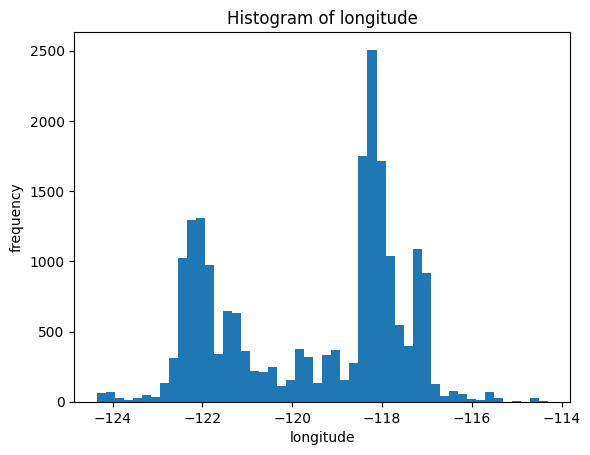

column: latitude


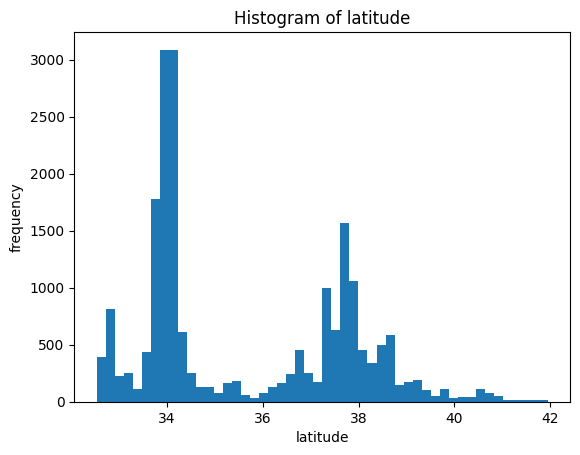

column: housing_median_age


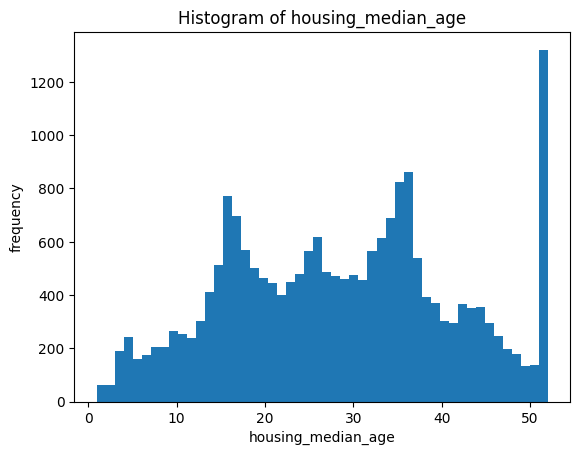

column: total_rooms


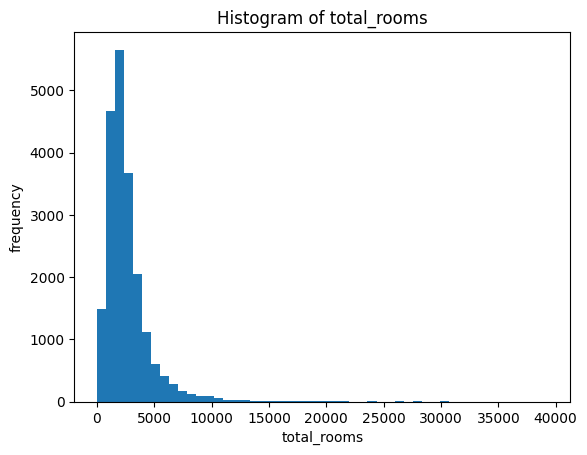

column: total_bedrooms


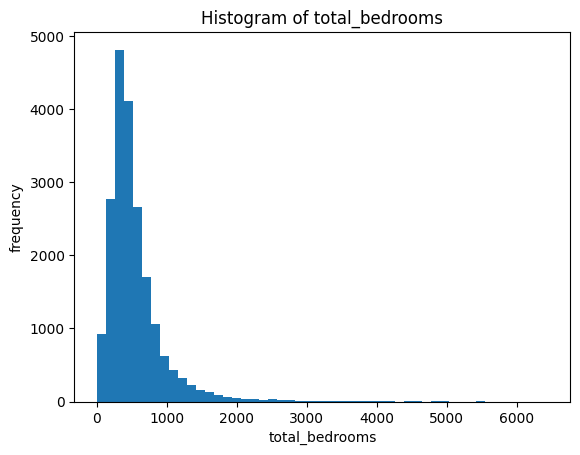

column: population


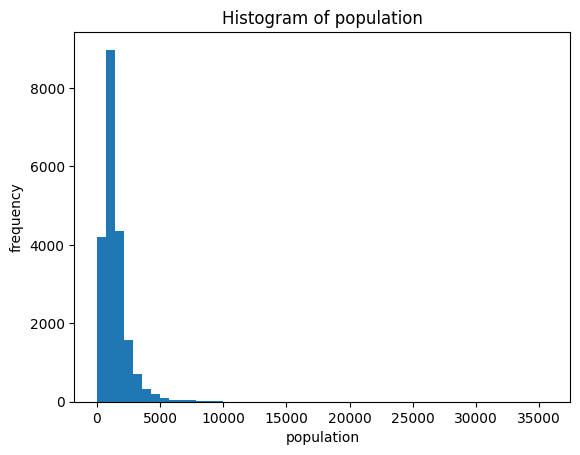

column: median_income


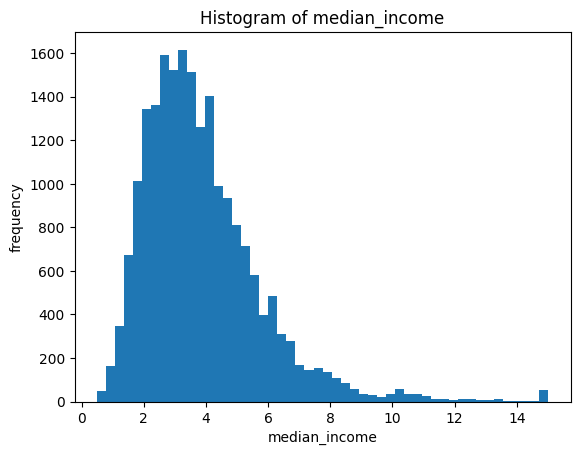

column: median_house_value


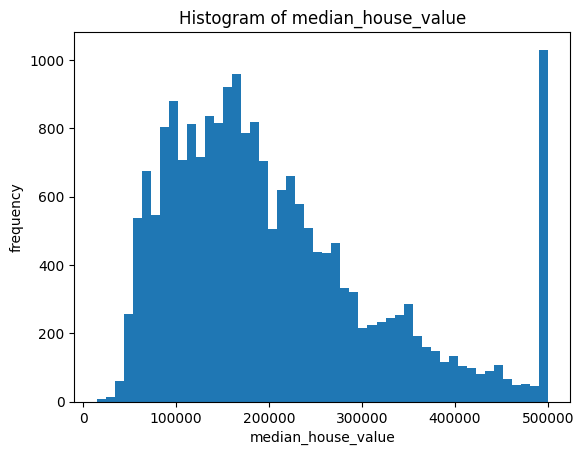

In [2]:
def plot_histogram(df, col):
    bins=50
    col_list = list(housing)
 #   col_list.remove('ocean_proximity')
    print("column: "+col)
    plt.hist(housing[col], bins=bins)
    plt.title("Histogram of "+col)
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

plot_histogram(housing, "longitude")
plot_histogram(housing, "latitude")
plot_histogram(housing, "housing_median_age")
plot_histogram(housing, "total_rooms")
plot_histogram(housing, "total_bedrooms")
plot_histogram(housing, "population")
plot_histogram(housing, "median_income")
plot_histogram(housing, "median_house_value")

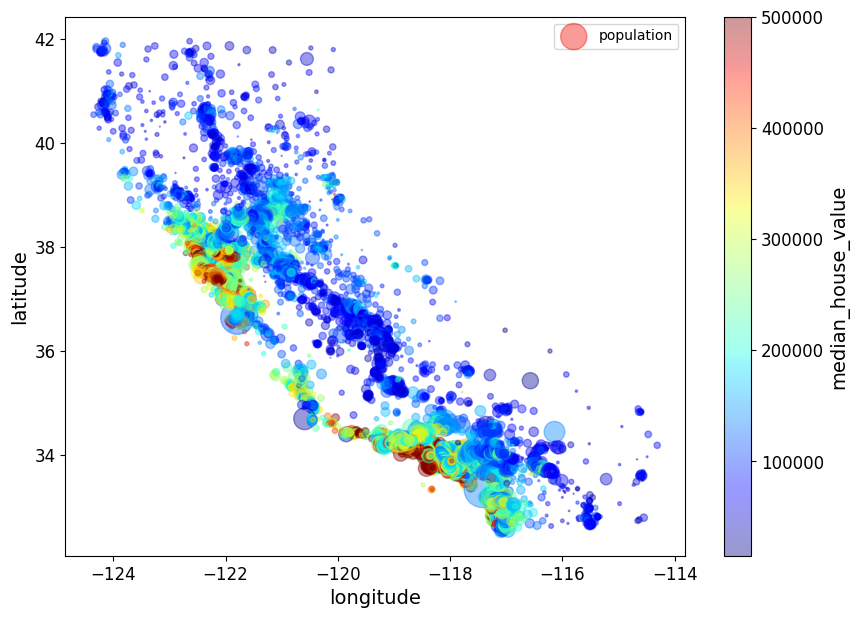

In [3]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

plt.legend()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

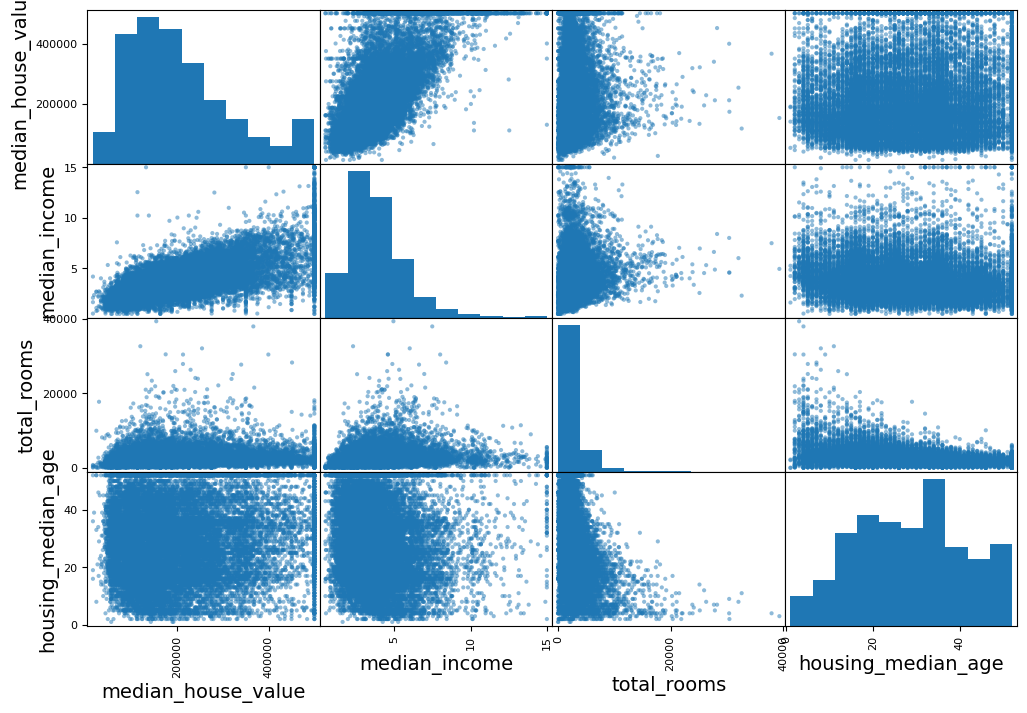

In [4]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

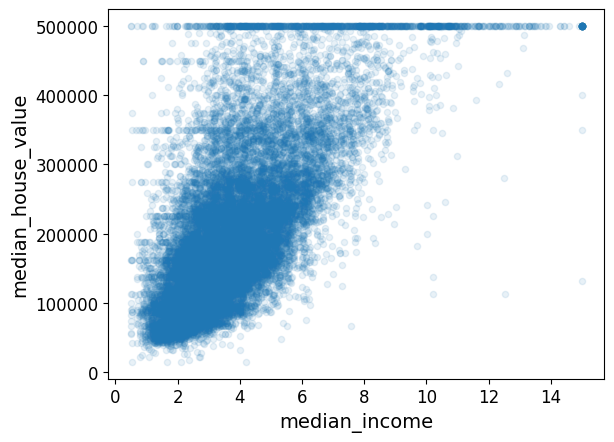

In [5]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [6]:
# check a structure of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#correlation between the median_house_value and other features
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


##**2. Preprocessing step**



####**2-1) Pre-processing**


In [8]:
# Counting NaN values in all columns
nan_count = housing.isna().sum()

print(nan_count)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64



**2-1.1) Data cleaning**

In [9]:
# replace the empty values with the median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**2-1.2) Attributes combinations**

In [10]:
# Attributes combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
del housing["total_rooms"], housing["total_bedrooms"]

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   population           20640 non-null  float64
 4   households           20640 non-null  float64
 5   median_income        20640 non-null  float64
 6   median_house_value   20640 non-null  float64
 7   ocean_proximity      20640 non-null  object 
 8   rooms_per_household  20640 non-null  float64
 9   bedrooms_per_room    20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**2-1.3) Feature Scaling**

**Scikit-Learn** provides a transformer called StandardScaler for standardization.

In [11]:
# feature standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# delete columns of text type and target variable
col_list = list(housing)
col_list.remove('ocean_proximity')  #text type
col_list.remove('median_house_value') #target variable needs not to be scaled

# generate a new dataframe that consist of numeric type only
housing_numeric = housing[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)
# Data type conversion from 'Series' to 'DataFrame'
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns=housing_numeric.columns)

# Concatenate
housing = pd.concat([housing_scaled_df, housing['median_house_value'], housing['ocean_proximity']], axis=1)
housing.head()

longitude  latitude  housing_median_age  population  households  \
0  -1.327835  1.052548            0.982143   -0.974429   -0.977033   
1  -1.322844  1.043185           -0.607019    0.861439    1.669961   
2  -1.332827  1.038503            1.856182   -0.820777   -0.843637   
3  -1.337818  1.038503            1.856182   -0.766028   -0.733781   
4  -1.337818  1.038503            1.856182   -0.759847   -0.629157   

   median_income  rooms_per_household  bedrooms_per_room  median_house_value  \
0       2.344766             0.628559          -1.029988            452600.0   
1       2.332238             0.327041          -0.888897            358500.0   
2       1.782699             1.155620          -1.291686            352100.0   
3       0.932968             0.156966          -0.449613            341300.0   
4      -0.012881             0.344711          -0.639087            342200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
4        NEAR BAY

**2-1.4) Handling Text and Categorical Attributes**

In [12]:
# One-hot encoding
housing = pd.get_dummies(housing)
housing.head(10)

longitude  latitude  housing_median_age  population  households  \
0  -1.327835  1.052548            0.982143   -0.974429   -0.977033   
1  -1.322844  1.043185           -0.607019    0.861439    1.669961   
2  -1.332827  1.038503            1.856182   -0.820777   -0.843637   
3  -1.337818  1.038503            1.856182   -0.766028   -0.733781   
4  -1.337818  1.038503            1.856182   -0.759847   -0.629157   
5  -1.337818  1.038503            1.856182   -0.894071   -0.801787   
6  -1.337818  1.033821            1.856182   -0.292712    0.037823   
7  -1.337818  1.033821            1.856182   -0.237079    0.385698   
8  -1.342809  1.033821            1.061601   -0.193810    0.249687   
9  -1.337818  1.033821            1.856182    0.110844    0.560944   

   median_income  rooms_per_household  bedrooms_per_room  median_house_value  \
0       2.344766             0.628559          -1.029988            452600.0   
1       2.332238             0.327041          -0.888897            358500.0   
2       1.782699             1.155620          -1.291686            352100.0   
3       0.932968             0.156966          -0.449613            341300.0   
4      -0.012881             0.344711          -0.639087            342200.0   
5       0.087447            -0.269730           0.275563            269700.0   
6      -0.111366            -0.200918          -0.320242            299200.0   
7      -0.395137            -0.255232           0.115458            241400.0   
8      -0.942359            -0.458703           0.712372            226700.0   
9      -0.094470            -0.185283          -0.223507            261100.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   False                   False   
1                      False                   False                   False   
2                      False                   False                   False   
3                      False                   False                   False   
4                      False                   False                   False   
5                      False                   False                   False   
6                      False                   False                   False   
7                      False                   False                   False   
8                      False                   False                   False   
9                      False                   False                   False   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                      True                       False  
1                      True                       False  
2                      True                       False  
3                      True                       False  
4                      True                       False  
5                      True                       False  
6                      True                       False  
7                      True                       False  
8                      True                       False  
9                      True                       False

# Dimensionality Reduction
## 1. PCA

/tmp/ipykernel_3145/345316622.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(housing_reduced[:, 0], housing_reduced[:, 1], c='y', cmap='viridis')


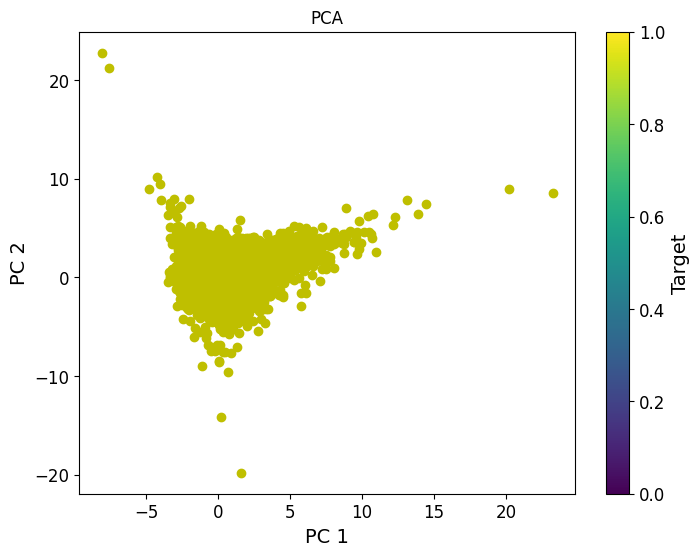

In [13]:
# Linear PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Build a PCA model and reduce the dimensionality into 2. (You can change the number of dimension as you want.)
pca = PCA(n_components=2)
housing_reduced = pca.fit_transform(housing_scaled_df)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(housing_reduced[:, 0], housing_reduced[:, 1], c='y', cmap='viridis')
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')
plt.show()

In [ ]:
# Kernel PCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Build a Kernel PCA model and reduce the dimensionality into 2.
# I use rbf kernel.
kpca = KernelPCA(kernel='rbf', gamma=0.1, n_components=2)
X_kpca = kpca.fit_transform(housing_scaled_df)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis')
plt.title('Kernel PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')
plt.show()

# 3. Clustering

## KMeans

In [15]:
df = housing[['longitude', 'latitude', 'median_income']]
df

longitude  latitude  median_income
0      -1.327835  1.052548       2.344766
1      -1.322844  1.043185       2.332238
2      -1.332827  1.038503       1.782699
3      -1.337818  1.038503       0.932968
4      -1.337818  1.038503      -0.012881
...          ...       ...            ...
20635  -0.758826  1.801647      -1.216128
20636  -0.818722  1.806329      -0.691593
20637  -0.823713  1.778237      -1.142593
20638  -0.873626  1.778237      -1.054583
20639  -0.833696  1.750146      -0.780129

[20640 rows x 3 columns]

In [16]:

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
kmeans = KMeans(n_clusters=6) # number of clusters must be specified
model = kmeans.fit(df)
model

/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [17]:
centers = model.cluster_centers_
centers[:5]

array([[ 0.77014467, -0.82787086,  0.78446467],
       [-1.1617992 ,  1.27175014, -0.55090364],
       [ 0.87203687, -0.84946699, -0.55594515],
       [-0.0799272 ,  0.22949379, -0.65716654],
       [ 0.16197754, -0.33734158,  3.52434975]])

In [18]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [19]:
P = pd_centers(['longitude', 'latitude', 'median_income'], centers)
P

longitude  latitude  median_income  prediction
0   0.770145 -0.827871       0.784465           0
1  -1.161799  1.271750      -0.550904           1
2   0.872037 -0.849467      -0.555945           2
3  -0.079927  0.229494      -0.657167           3
4   0.161978 -0.337342       3.524350           4
5  -1.189960  0.972015       0.859838           5

In [20]:
# Create cluster label
data = pd.read_csv('housing.csv')

data['econ_region'] = kmeans.fit_predict(df)
data['econ_region'] = data['econ_region'].astype("category")
data.head()

/home/duc/.conda/envs/data-mining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

  econ_region  
0           2  
1           2  
2           2  
3           2  
4           1

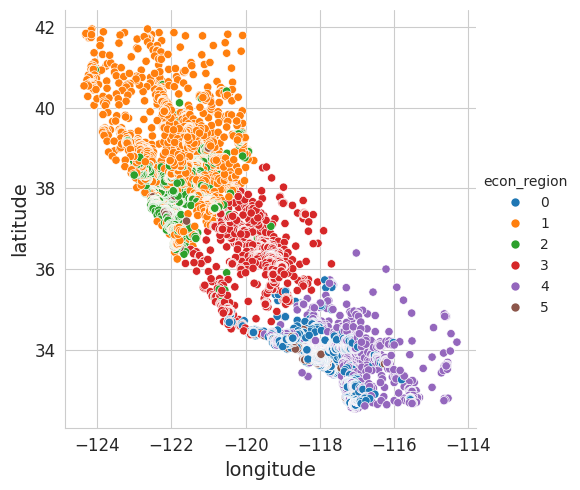

In [22]:
import seaborn as sns

sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data, kind='scatter');

In [23]:
median_attributes = ['econ_region', 'median_house_value', 'median_income', 'housing_median_age']
income_house = data[median_attributes]
income_house.groupby(['econ_region']).describe()

/tmp/ipykernel_3145/2750759377.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_house.groupby(['econ_region']).describe()


median_house_value                                          \
                         count           mean            std       min   
econ_region                                                              
0                       4130.0  273568.443341  102640.640238   14999.0   
1                       4828.0  156025.277133   86542.733318   14999.0   
2                       2813.0  285523.777462  103496.708144   67500.0   
3                       1659.0  105135.083785   69138.675689   26600.0   
4                       6661.0  173059.686984   81771.210067   14999.0   
5                        549.0  466353.892532   68805.026680  112500.0   

                                                    median_income             \
                  25%       50%       75%       max         count       mean   
econ_region                                                                    
0            195400.0  248000.0  335600.0  500001.0        4130.0   5.342308   
1             94200.0  133700.0  192225.0  500001.0        4828.0   2.811998   
2            206700.0  269600.0  351400.0  500001.0        2813.0   5.483355   
3             61550.0   81700.0  118200.0  500001.0        1659.0   2.623183   
4            117800.0  158900.0  202500.0  500001.0        6661.0   2.806714   
5            462800.0  500001.0  500001.0  500001.0         549.0  10.525550   

             ...                     housing_median_age                        \
             ...        75%      max              count       mean        std   
econ_region  ...                                                                
0            ...   6.005175   8.4721             4130.0  26.456659  12.275682   
1            ...   3.472200   4.5590             4828.0  30.629453  13.434771   
2            ...   6.095700   9.5551             2813.0  27.211518  13.248167   
3            ...   3.212000   5.0100             1659.0  25.556359  11.125490   
4            ...   3.455900   4.1518             6661.0  30.004053  11.612053   
5            ...  11.307400  15.0001              549.0  27.637523  13.883960   

                                          
             min   25%   50%   75%   max  
econ_region                               
0            1.0  16.0  26.0  35.0  52.0  
1            2.0  19.0  30.0  42.0  52.0  
2            1.0  17.0  26.0  36.0  52.0  
3            2.0  17.0  25.0  34.0  52.0  
4            1.0  21.0  31.0  38.0  52.0  
5            2.0  17.0  26.0  37.0  52.0  

[6 rows x 24 columns]

##DBSCAN

In [70]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
# DBSCAN clustering

kmeans = DBSCAN(eps=0.3, min_samples=10)
model = kmeans.fit(df)
model

DBSCAN(eps=0.3, min_samples=10)

In [71]:
from collections import Counter

In [72]:
Counter(model.labels_)

Counter({0: 20401, -1: 170, 3: 36, 1: 16, 4: 10, 2: 7})

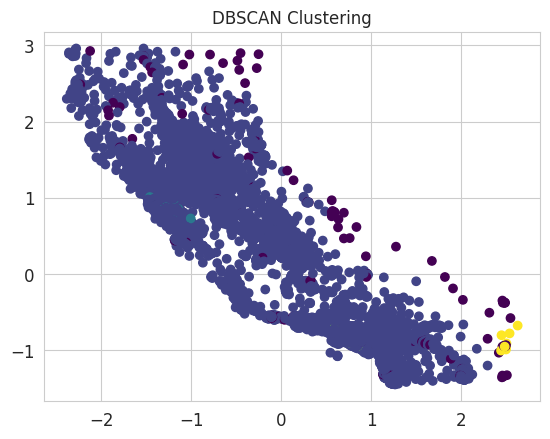

In [73]:
# Visualizing
plt.scatter(df["longitude"], df["latitude"], c=model.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


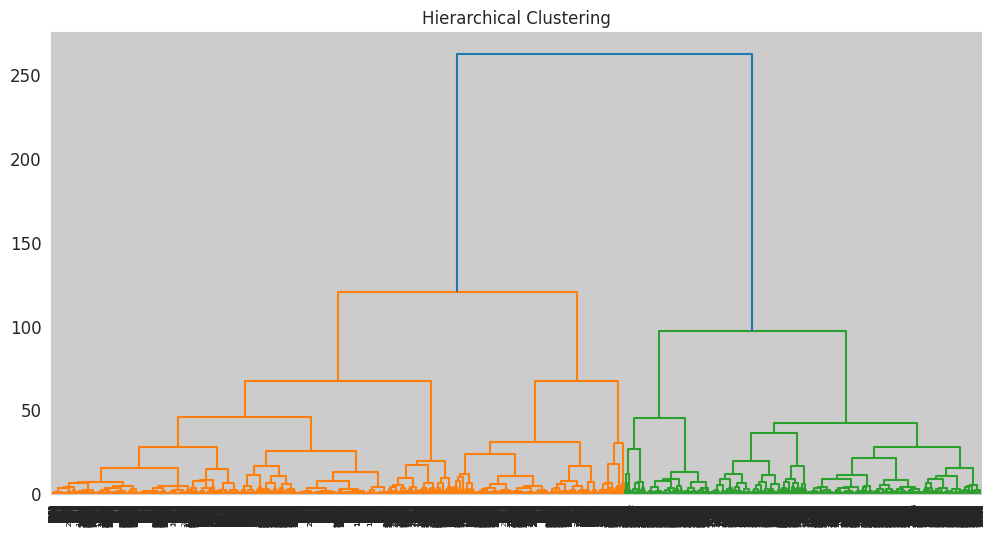

In [74]:
# Import hierarchical custering in scipy package
from scipy.cluster.hierarchy import dendrogram, linkage

X_train = df.to_numpy()

# Calculate distance matrix
linked = linkage(X_train, method='ward')

# Visualizing dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=range(X_train.shape[0]), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering')
plt.show()
